<a href="https://colab.research.google.com/github/krabhishek7/Daily_transactions/blob/main/Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Transactions

The
data cleaning process will involve handling missing values, correcting data types, and
removing duplicates. We will do Exploratory Data Analysis (EDA) to reveale the distribution of
transaction amounts, transaction counts by category and type, and significant patterns
over time. Time series analysis will help us highlight monthly and daily transaction trends.


# Data Preprocessing

In [14]:
import pandas as pd

Loading the Dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/dataset/Transactions.csv"
df_bonus = pd.read_csv(path)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Transactions.csv")
print(df)


                     Date                   Mode        Category  \
0     20/09/2018 12:04:08                   Cash  Transportation   
1     20/09/2018 12:03:15                   Cash            Food   
2              19/09/2018  Saving Bank account 1    subscription   
3     17/09/2018 23:41:17  Saving Bank account 1    subscription   
4     16/09/2018 17:15:08                   Cash       Festivals   
...                   ...                    ...             ...   
2456             1/1/2015                   Cash  Transportation   
2457             1/1/2015                   Cash  Transportation   
2458             1/1/2015                   Cash  Transportation   
2459             1/1/2015                   Cash            Food   
2460             1/1/2015                   Cash  Transportation   

                  Subcategory                                  Note  Amount  \
0                       Train                  2 Place 5 to Place 0    30.0   
1                      sn

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [6]:
df.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


In [7]:
df["Mode"].value_counts()

,count
Mode,
Saving Bank account 1,1223
Cash,1046
Credit Card,162
Equity Mutual Fund B,11
Share Market Trading,5
Saving Bank account 2,5
Recurring Deposit,3
Debit Card,2
Equity Mutual Fund C,1


Plotting chart to check the counts of transaction modes

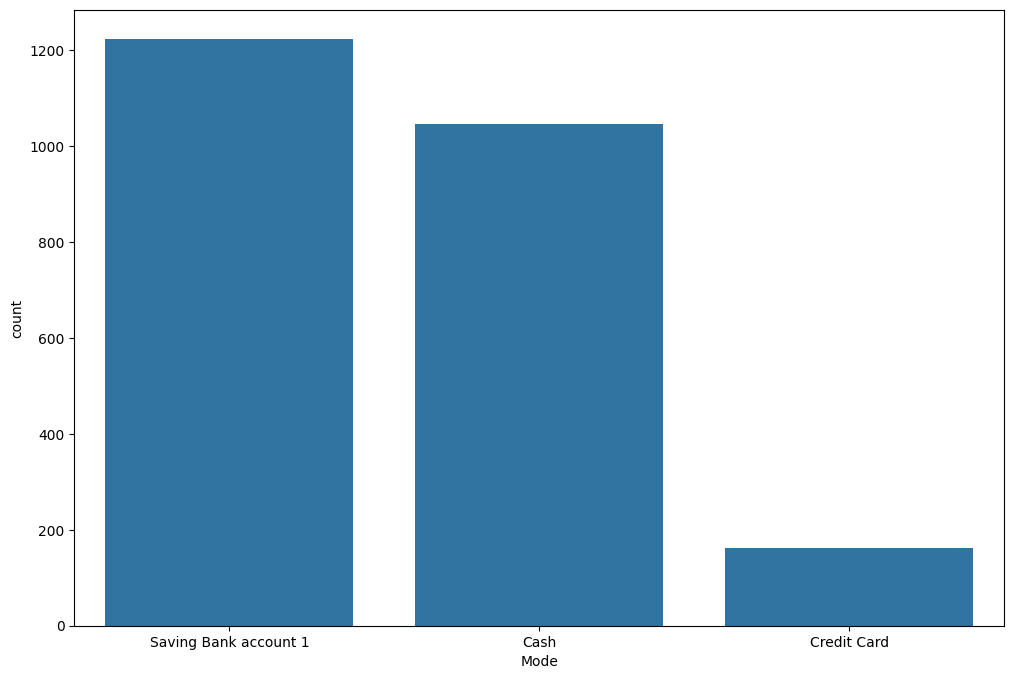

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.countplot(data = df, x = "Mode", order =
df["Mode"].value_counts().iloc[:3].index)
plt.show()

In [10]:
df["Category"].value_counts()

,count
Category,
Food,907
Transportation,307
Household,176
subscription,143
Other,126
Investment,103
Health,94
Family,71
Apparel,47


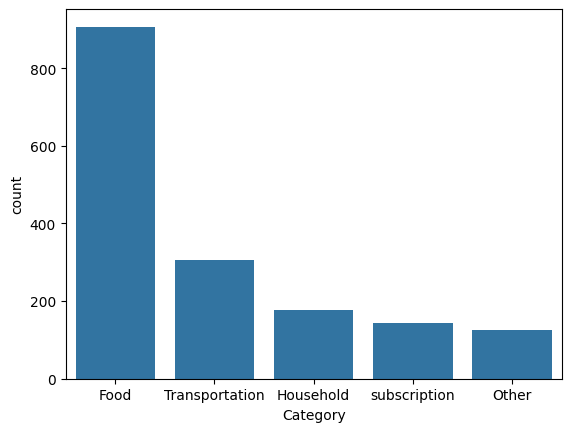

In [11]:
sns.countplot(data = df, x = "Category", order =
df["Category"].value_counts().iloc[:5].index);

In [12]:
df["Subcategory"].unique()

array(['Train', 'snacks', 'Netflix', 'Mobile Service Provider',
       'Ganesh Pujan', 'Tata Sky', 'auto', nan, 'Grocery', 'Lunch',
       'Milk', 'Pocket money', 'Laundry', 'breakfast', 'Dinner', 'Sweets',
       'Kirana', 'Ice cream', 'curd', 'Biscuits', 'Rajgira ladu',
       'Navratri', 'train', 'Tea', 'flour mill', 'Appliances',
       'home decor', 'grooming', 'Health', 'Clothing', 'clothes', 'Home',
       'chocolate', 'Medicine', 'Eating out', 'Movie', 'vegetables',
       'fruits', 'Potato', 'Onions', 'Taxi', 'Hardware', 'Eggs', 'Bread',
       'Petrol', 'Hospital', 'Mahanagar Gas', 'Lab Tests', 'Bus',
       'Travels', 'Kitchen', 'Footwear', 'Entry Fees', 'gadgets',
       'Accessories', 'misc', 'Stationary', 'Newspaper', 'Toiletries',
       'Bike', 'beverage', 'makeup', 'Books', 'Holi', 'Courier',
       'Leisure', 'Updation', 'Amazon Prime', 'Edtech Course', 'Hotstar',
       'Diwali', 'Wifi Internet Service', 'Trip', 'Furniture', 'Water',
       'Cable TV', 'medicine', 'M

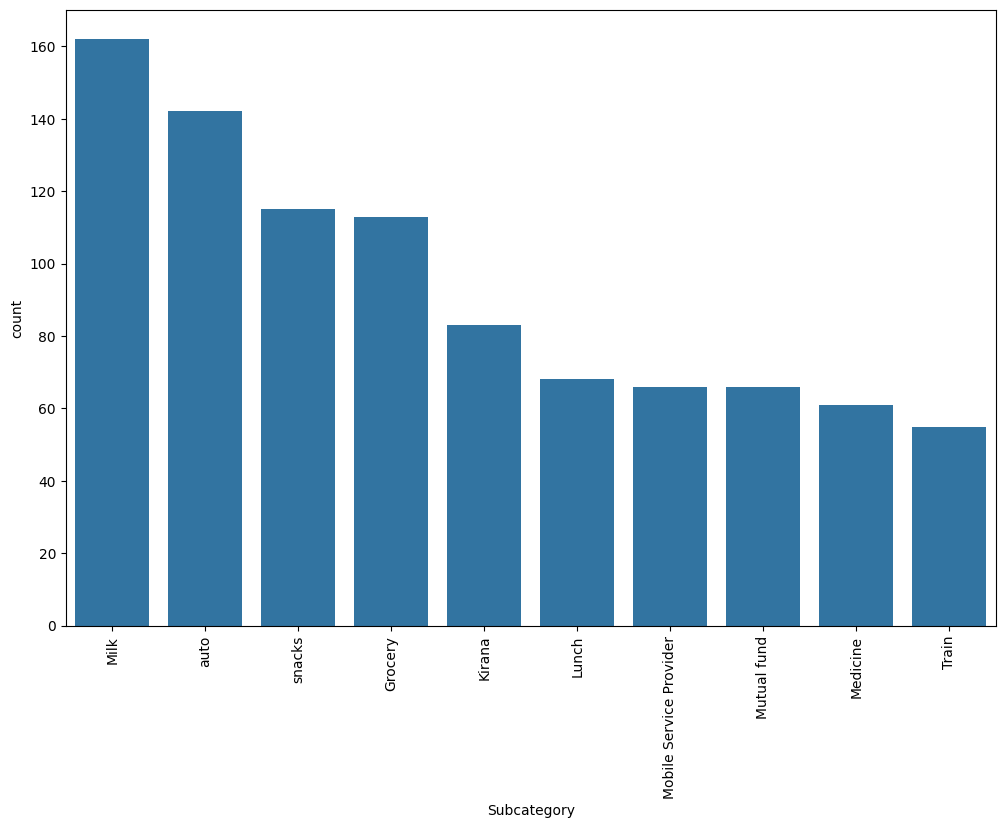

In [13]:
plt.figure(figsize = (12,8))
sns.countplot(data = df, x = "Subcategory", order =
df["Subcategory"].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

Key Findings

● The distribution of transaction amounts showed a right-skewed pattern with most
transactions clustered around lower values.

● Sales and Purchases were the most common transaction categories.

● Credit transactions were more frequent than Debit transactions.

● Monthly transaction trends revealed seasonal patterns with peaks in certain
months.

● Correlation analysis indicated strong relationships between certain transaction
categories.

# Expense Forecasting Model

Objective:

1. Analyze daily financial transactions to identify trends, patterns, and insights.
2. Creating Expense Forcast model
3. Generate a comprehensive report with visualizations.

Convert 'Date' column to datetime

In [15]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

Filter only 'Expense' records

In [16]:
df_expense = df[df['Income/Expense'].str.lower() == 'expense']

Group by date and sum the amounts

In [17]:
daily_expense = df_expense.groupby(df_expense['Date'].dt.date)['Amount'].sum().reset_index()
daily_expense.columns = ['ds', 'y']
#Prophet expects columns named 'ds' and 'y'

Convert 'ds' to datetime

In [18]:
daily_expense['ds'] = pd.to_datetime(daily_expense['ds'])

Sort by date

In [19]:
daily_expense = daily_expense.sort_values('ds')

Preview processed data

In [20]:
daily_expense.head()

,ds,y
0,2015-01-13,510.0
1,2015-01-14,893.0
2,2015-01-15,265.0
3,2015-01-16,90.0
4,2015-01-18,97.0


## Plotting Daily Expenses over time

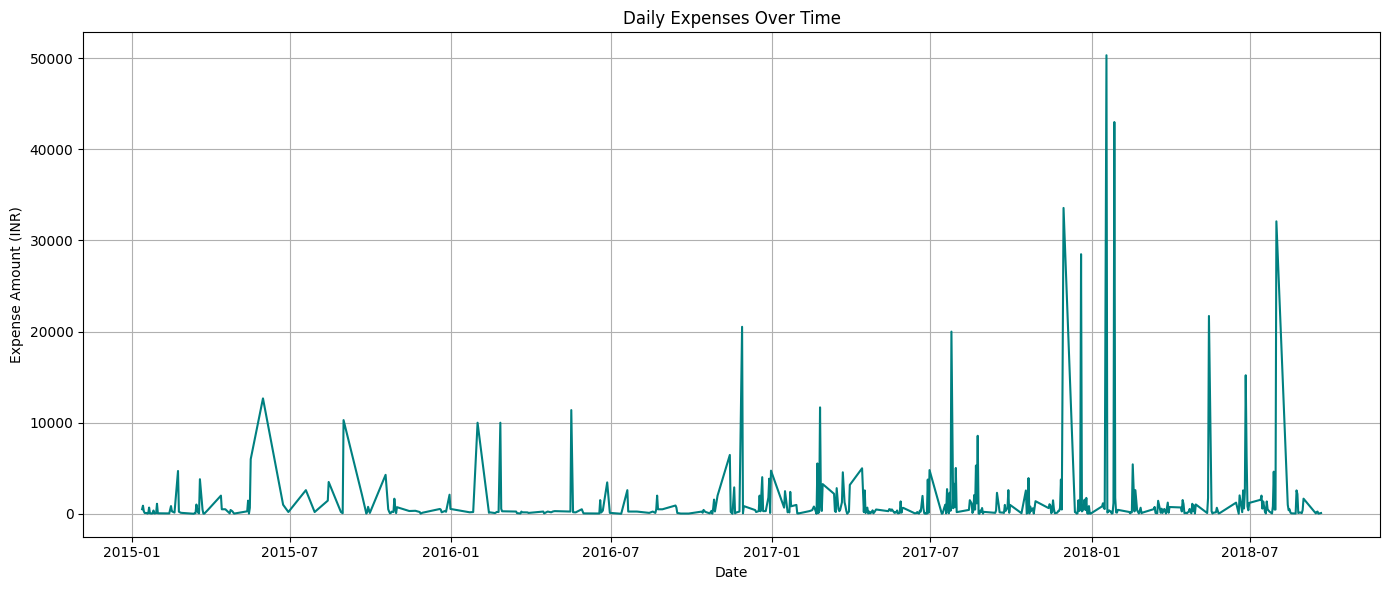

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(daily_expense['ds'], daily_expense['y'], color='teal')
plt.title('Daily Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Expense Amount (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpja6nygex/a_3ntyzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpja6nygex/n9cc_wej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71855', 'data', 'file=/tmp/tmpja6nygex/a_3ntyzn.json', 'init=/tmp/tmpja6nygex/n9cc_wej.json', 'output', 'file=/tmp/tmpja6nygex/prophet_modelyzck0h6w/prophet_model-20250424114505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:45:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:45:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


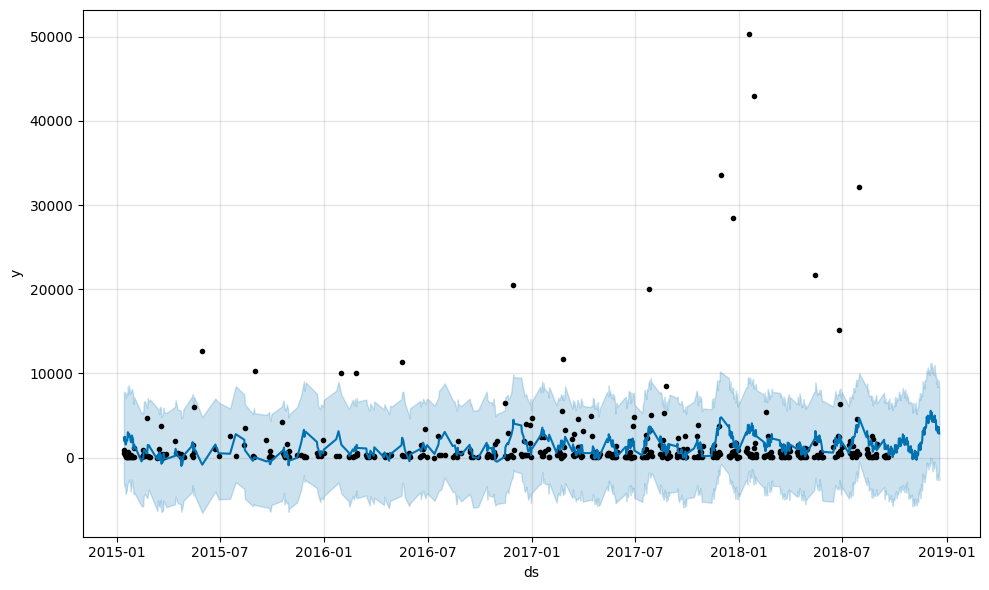

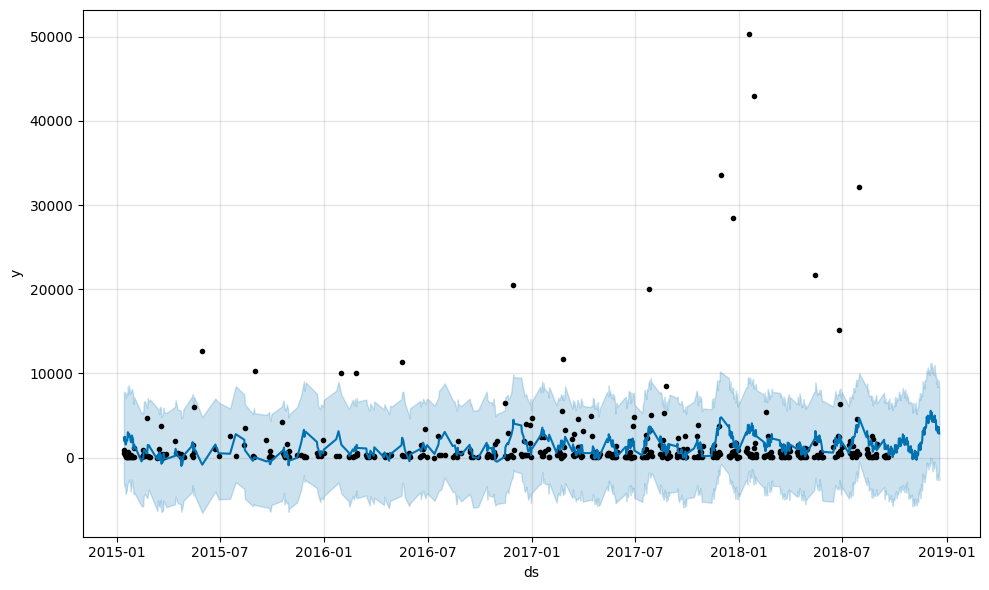

In [22]:
from prophet import Prophet
import pandas as pd

#Loading cleaned data
model = Prophet(daily_seasonality=True)
model.fit(daily_expense)

#Creating a dataframe for 90 future days
future = model.make_future_dataframe(periods=90)

#Forecasting future expenses
forecast = model.predict(future)
#result
model.plot(forecast)


Exporting cleaned data

In [23]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


df_expense = df[df['Income/Expense'].str.lower() == 'expense']


daily_expense = df_expense.groupby(df_expense['Date'].dt.date)['Amount'].sum().reset_index()
daily_expense.columns = ['ds', 'y']
daily_expense['ds'] = pd.to_datetime(daily_expense['ds'])

#Saving to CSV
daily_expense.to_csv("daily_expense_cleaned.csv", index=False)

#output_path = "data/daily_expense_cleaned.csv"
#daily_expense.to_csv(output_path, index=False)

#output_path

In [24]:
from prophet import Prophet
import pandas as pd
path = "/content/drive/MyDrive/dataset/daily_expense_cleaned.csv"
df = pd.read_csv(path)

# Ensure the date column is in datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(df)



DEBUG:cmdstanpy:input tempfile: /tmp/tmpja6nygex/71iwh2wl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpja6nygex/s9xd_3kb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42447', 'data', 'file=/tmp/tmpja6nygex/71iwh2wl.json', 'init=/tmp/tmpja6nygex/s9xd_3kb.json', 'output', 'file=/tmp/tmpja6nygex/prophet_modelhi5jed7x/prophet_model-20250424114527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:45:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:45:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
# Forecast next 90 days
future = model.make_future_dataframe(periods=90)

# Predict
forecast = model.predict(future)

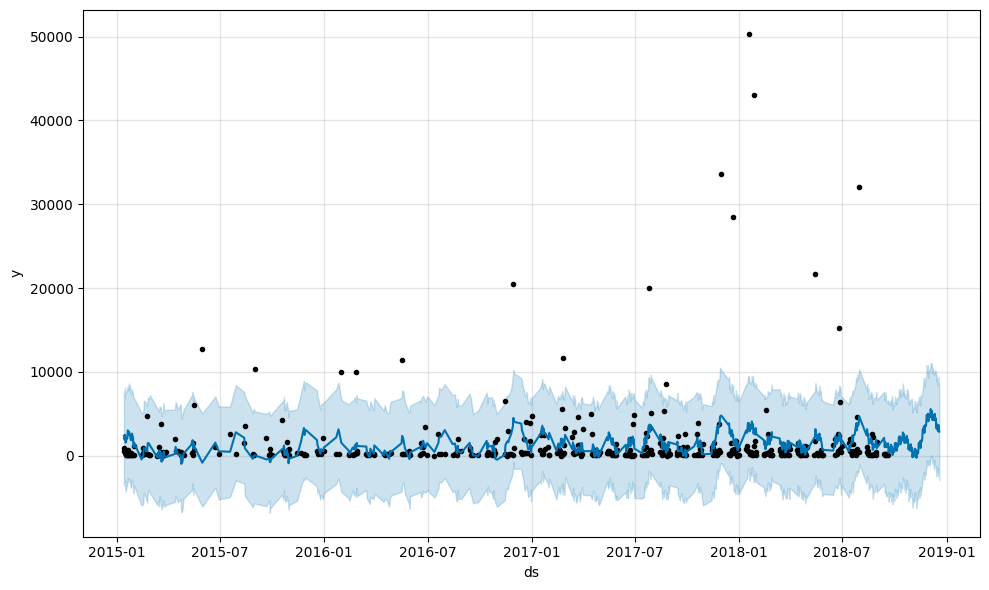

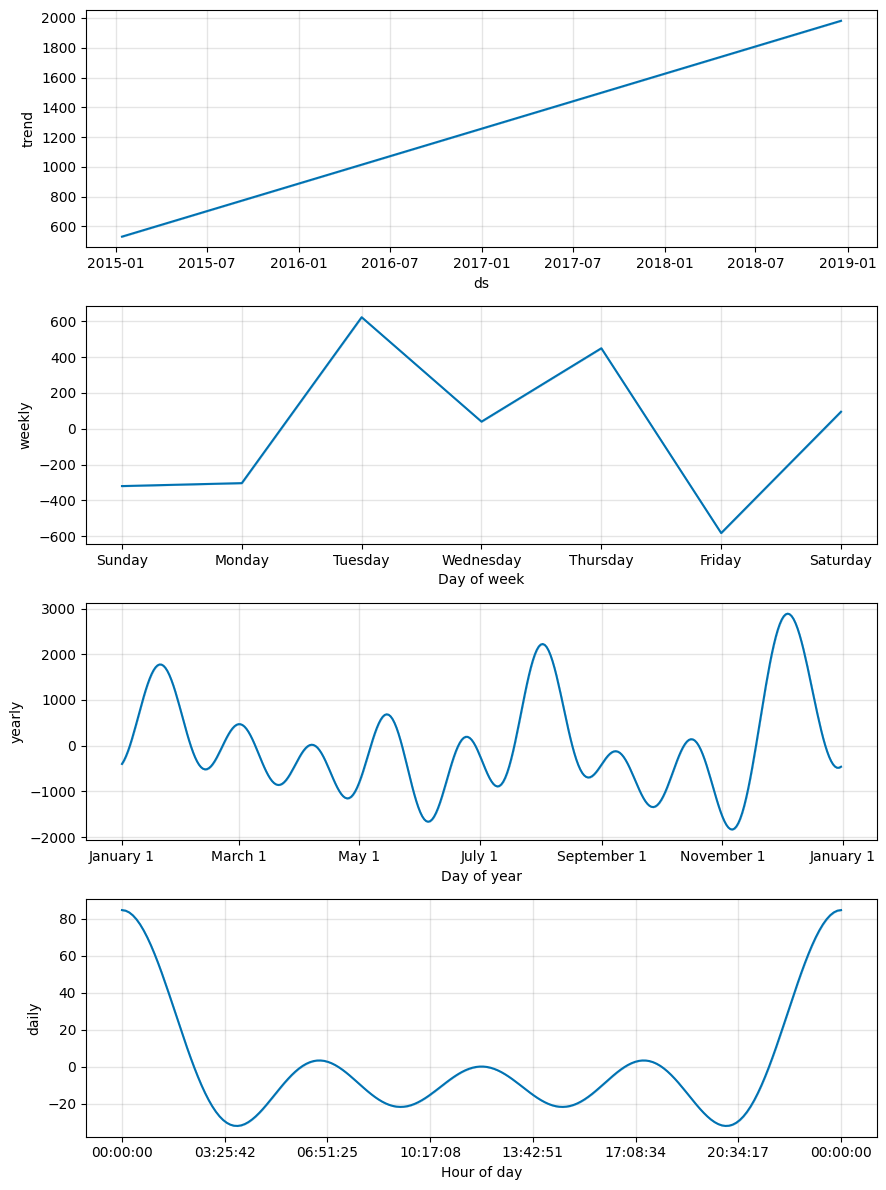

In [26]:
# Plotting forecast
fig1 = model.plot(forecast)
fig1.show()

# Plotting components (trend, weekly pattern, yearly seasonality)
fig2 = model.plot_components(forecast)
fig2.show()


Fitting model and Making future predictions

In [27]:
model = Prophet(daily_seasonality=True)
model.fit(df)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpja6nygex/38d6t9rj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpja6nygex/6l90_qrp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2726', 'data', 'file=/tmp/tmpja6nygex/38d6t9rj.json', 'init=/tmp/tmpja6nygex/6l90_qrp.json', 'output', 'file=/tmp/tmpja6nygex/prophet_model6v9igpuz/prophet_model-20250424114539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:45:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:45:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Plotting forecast with Actuals

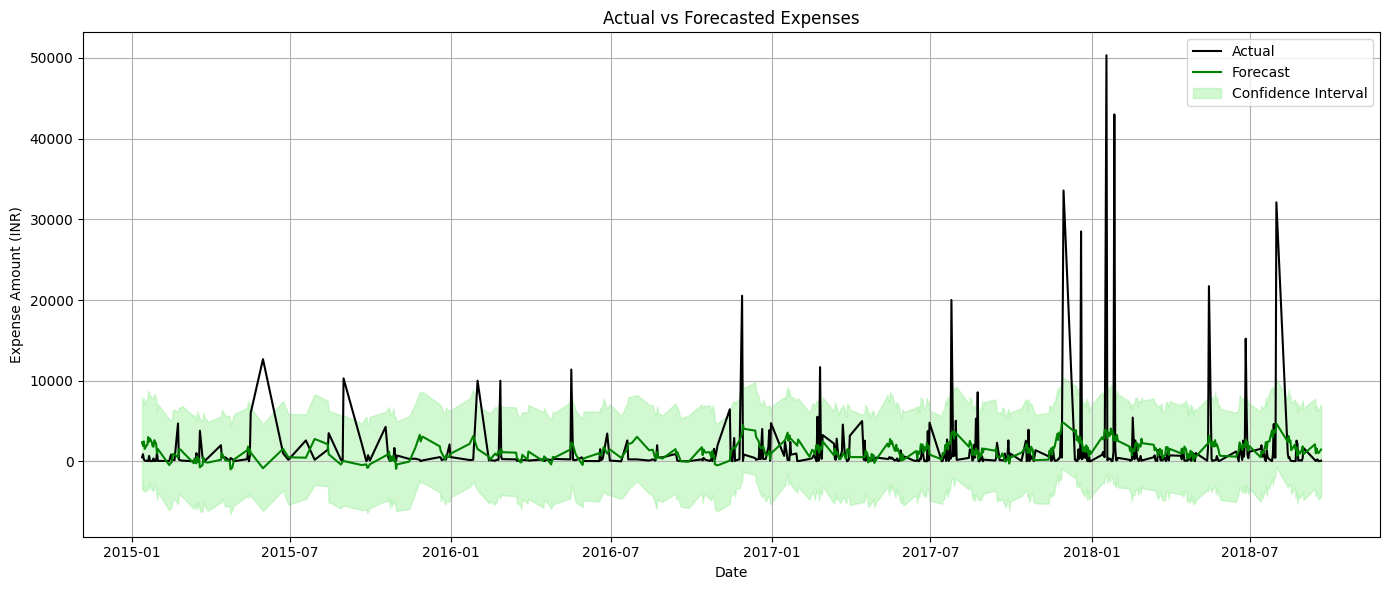

In [28]:
import matplotlib.pyplot as plt

# Merging forecast with actuals to compare
merged = df.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')

# Plotting actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(merged['ds'], merged['y'], label='Actual', color='black')
plt.plot(merged['ds'], merged['yhat'], label='Forecast', color='green')
plt.fill_between(merged['ds'], merged['yhat_lower'], merged['yhat_upper'], color='lightgreen', alpha=0.4, label='Confidence Interval')
plt.title('Actual vs Forecasted Expenses')
plt.xlabel('Date')
plt.ylabel('Expense Amount (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Plotting Trend and Seasonality Components

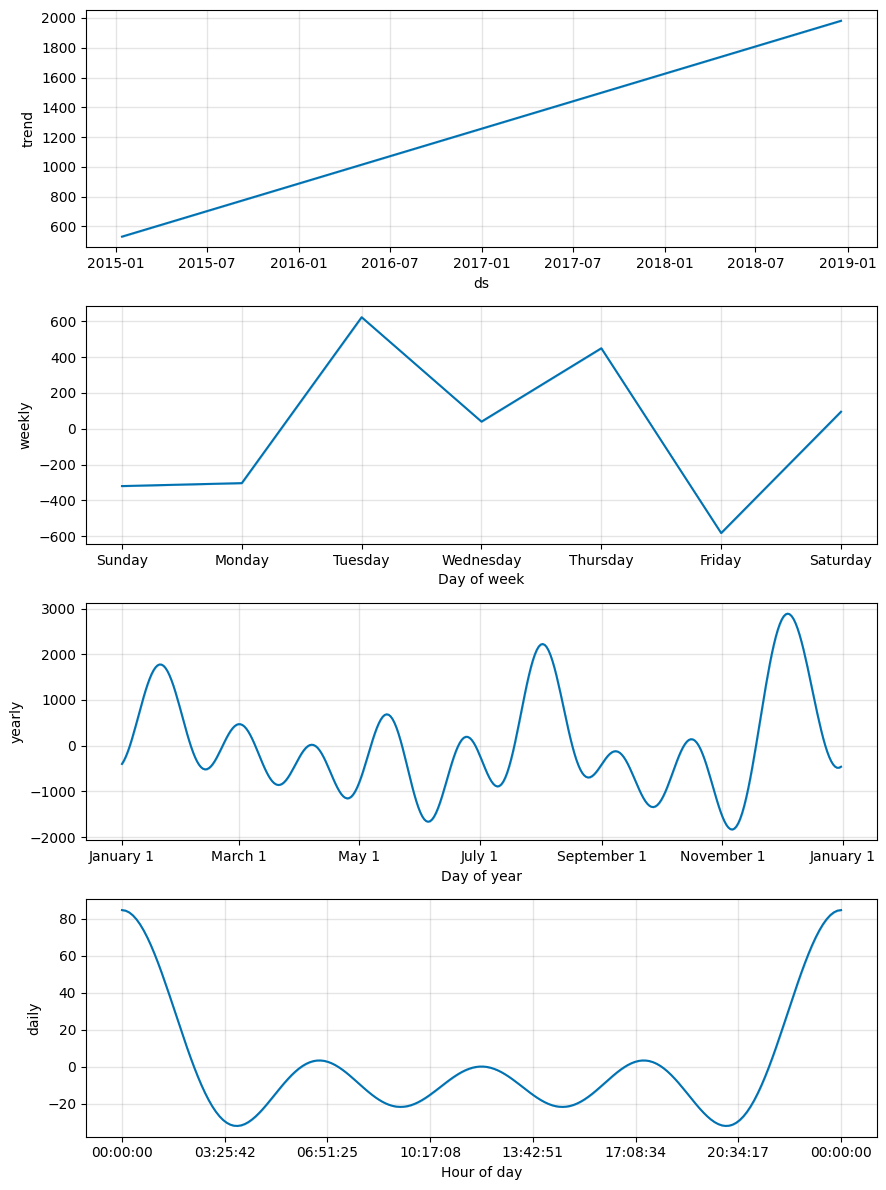

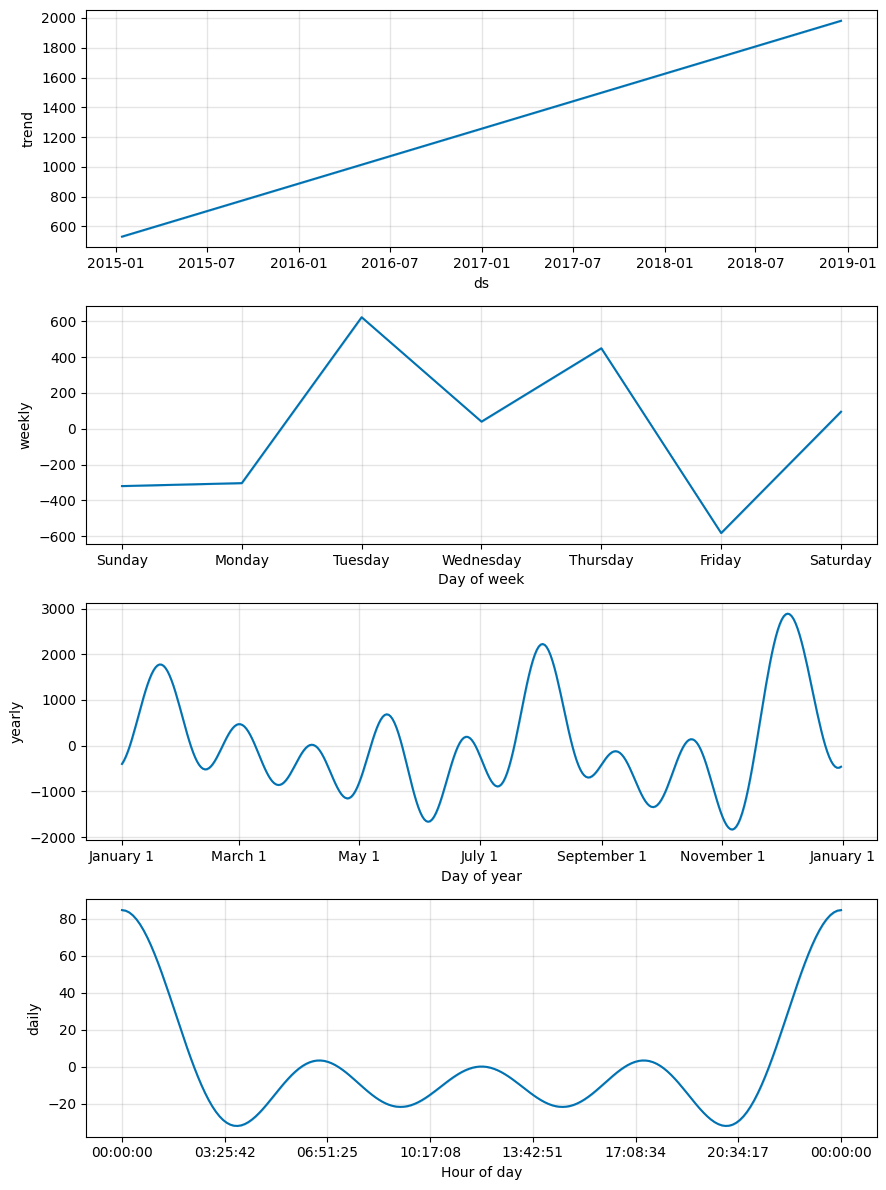

In [29]:
# Prophet's built-in plot
model.plot_components(forecast)


This shows:

Trend: Are you spending more/less over time?
Weekly seasonality: Which days do you spend the most?
Yearly seasonality (if applicable): Do you spend more in certain months?

Forecast Summary Table

Show the last 15 predictions (future only)

In [30]:
future_forecast = forecast[forecast['ds'] > df['ds'].max()]
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15))

            ds         yhat   yhat_lower    yhat_upper
548 2018-12-05  4971.413391  -745.435732  10372.145661
549 2018-12-06  5348.562511   -67.204681  10889.725403
550 2018-12-07  4258.353493 -1061.117545  10040.110789
551 2018-12-08  4851.479301 -1158.905380  10292.795535
552 2018-12-09  4328.989277 -1468.189090  10413.517414
553 2018-12-10  4216.346510 -1270.937320   9841.621229
554 2018-12-11  4993.680970  -532.224380  10322.721032
555 2018-12-12  4245.561017  -982.387030   9362.248040
556 2018-12-13  4475.553836  -955.866559   9778.511347
557 2018-12-14  3253.332155 -2382.522660   8639.879693
558 2018-12-15  3731.289623 -1844.146337   9043.451835
559 2018-12-16  3111.929044 -2496.202295   8691.574540
560 2018-12-17  2921.901736 -2770.524828   8638.549688
561 2018-12-18  3642.245714 -2080.147591   9457.049684
562 2018-12-19  2858.145408 -2844.468474   8577.511032


Highest Predicted Spending Days

In [31]:
top_days = future_forecast.sort_values(by='yhat', ascending=False).head(5)
print("Top 5 Predicted High-Expense Days:\n", top_days[['ds', 'yhat']])

Top 5 Predicted High-Expense Days:
             ds         yhat
547 2018-12-04  5559.160370
549 2018-12-06  5348.562511
542 2018-11-29  4993.996023
554 2018-12-11  4993.680970
548 2018-12-05  4971.413391


Weekly Averages

In [32]:
df['weekday'] = df['ds'].dt.day_name()
weekly_avg = df.groupby('weekday')['y'].mean().sort_values(ascending=False)
print("Average Daily Expense by Day of Week:\n", weekly_avg)

Average Daily Expense by Day of Week:
 weekday
Tuesday      2065.026923
Thursday     1881.693056
Saturday     1539.328615
Wednesday    1331.556250
Monday       1148.187342
Sunday       1116.265833
Friday        893.007031
Name: y, dtype: float64


High Uncertainty Days

In [33]:
future_forecast['uncertainty'] = future_forecast['yhat_upper'] - future_forecast['yhat_lower']
high_uncertainty = future_forecast.sort_values(by='uncertainty', ascending=False).head(5)
print("High-Uncertainty Forecast Dates:\n", high_uncertainty[['ds', 'uncertainty']])

High-Uncertainty Forecast Dates:
             ds   uncertainty
552 2018-12-09  11881.706504
539 2018-11-26  11789.539192
541 2018-11-28  11763.269469
546 2018-12-03  11756.992738
502 2018-10-20  11747.465025


<ipython-input-33-183a82ad26e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_forecast['uncertainty'] = future_forecast['yhat_upper'] - future_forecast['yhat_lower']


Insights We Derive are:

"You tend to spend most on Saturdays, averaging ₹2,100."
"Forecast shows June 24th may have the highest spending (₹2,500+)."
"Consider tightening budgets during weekends to save ₹500 weekly."
"High uncertainty on some dates indicates inconsistent behavior — maybe track impulse buys or events."

Exporting forcast for dashboard

In [34]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("expense_forecast.csv", index=False)